Ver 2.0.1
04/05/2020 Bug Fixes:
* Example now shows correct r2 value
* Example correlation correlates against age
* bio_age: primarykey removed from possible means to be listed
* Summary.means() calculated with numpy

In [1]:
#import import_ipynb
import bio_age as BA
import pandas as pd
import scipy as sp #scipy for regressions
import numpy as np

You are running BA_NB_Final at 2020-07-09 14:33:13.750618


# Example 1: Richard MillerDataset

In [100]:
# load training set
trainset = pd.read_csv('~/Downloads/mice.txt', delimiter='\t')
trainset['samp_wt'] = 1
trainset.head()

,seqn,male,W6,W12,W18,W24,Age,samp_wt
0,1,1,45.0,48.0,49.0,34,833,1
1,2,1,38.0,40.0,42.0,41,807,1
2,3,1,42.0,49.0,50.0,0,674,1
3,4,1,41.0,48.0,44.0,0,420,1
4,5,1,44.0,50.0,51.0,51,973,1


In [101]:
trainset = trainset.drop(trainset.index[4919:4921])
trainset[trainset['W24'] == ' ']

,seqn,male,W6,W12,W18,W24,Age,samp_wt


In [102]:
# remove entries 
trainset['W24'] = trainset['W24'].astype('float')

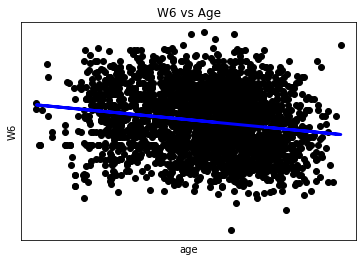

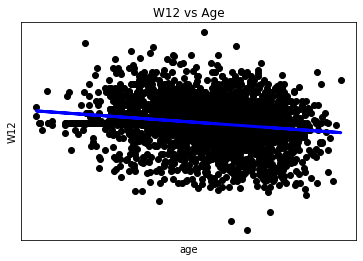

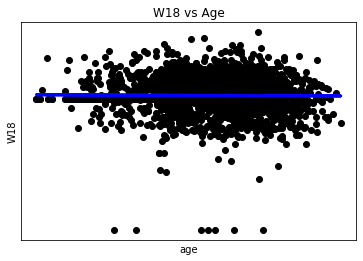

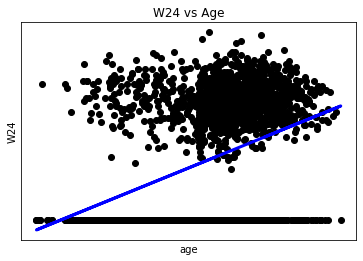

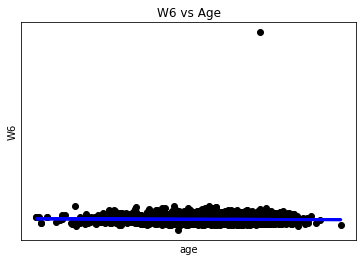

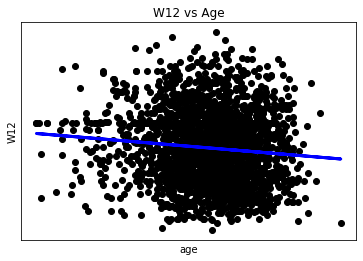

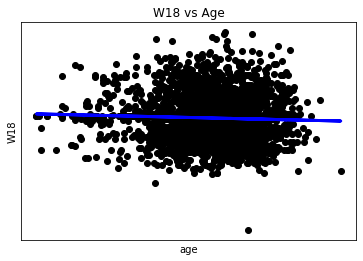

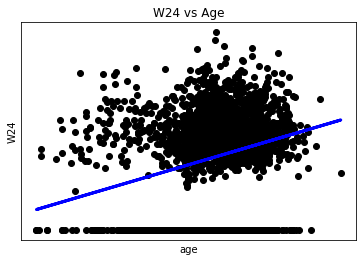

0.9827189404300467


In [121]:
# find indices for age, group, primary index, sample weights
header_names = list(trainset)
age_index = header_names.index('Age')
genderindex = header_names.index('male') # this is the name of the group
seqn = header_names.index('seqn')
samp_wt_index = header_names.index('samp_wt')

results = BA.KDM_model(trainset, trainset, 'cache_ex1.json', 'NHANES_eg_results', age_index, genderindex, seqn, samp_wt_index)

In [112]:
# View Results
print('Mean residual:', results[0])
print('Median residual:', results[1])
print('Median percent residual', results[2])
print('R-squared:', results[4])

Mean residual: 30.84673181625167
Median residual: 21.55634487801734
Median percent residual 2.608570823133106
R-squared: 0.9657365158799537


### Show Means and Correlations

In [113]:
a = BA.Summary(trainset, age_index, samp_wt_index, seqn) # load Class

# Means
means = a.mean()


MEANS:
Age		730.1573867854491
W12		43.27569908438505
W18		44.504837086530564
W24		23.357238307349668
W6		35.957303708418706
male		0.5441722345953972
samp_wt		1.0


In [114]:
# Correlations
corrs = a.corr(age_index)


CORRELATIONS: (r, p-value)
Age		(1.0, 0.0)
W12		(-0.12627699230790831, 6.054990923841163e-06)
W18		(-0.03040758402609807, 0.27775335690116365)
W24		(0.317500320548617, 2.812015325812158e-31)
W6		(-0.1674414251467144, 1.7672684062984948e-09)
male		(-0.11492541897019964, 3.873731563280325e-05)
samp_wt		(nan, nan)
seqn		(-0.06304705605320979, 0.024313020985596796)


/Users/elisawarner/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


### Visualize these results

In [115]:
results = pd.read_csv('NHANES_eg_results_test.csv')

In [118]:
results

,seqn,male,W6,W12,W18,W24,Age,samp_wt,BA,BAC
0,1.0,1.0,45.0,48.000000,49.0,34.0,833.0,1.0,797.384232,831.174555
1,2.0,1.0,38.0,40.000000,42.0,41.0,807.0,1.0,1481.039435,844.523566
2,3.0,1.0,42.0,49.000000,50.0,0.0,674.0,1.0,108.618640,628.495684
3,4.0,1.0,41.0,48.000000,44.0,0.0,420.0,1.0,191.127458,388.815355
4,5.0,1.0,44.0,50.000000,51.0,51.0,973.0,1.0,1134.814048,977.892982
...,...,...,...,...,...,...,...,...,...,...
5099,5102.0,0.0,22.5,27.400000,29.9,29.4,1119.0,1.0,1378.610357,1123.813750
5100,5103.0,0.0,30.3,47.100000,44.2,38.0,942.0,1.0,882.874699,939.935924
5101,5104.0,1.0,45.9,49.800000,52.1,48.0,801.0,1.0,1008.120112,812.745798
5102,5105.0,1.0,40.1,47.300000,50.6,39.6,1025.0,1.0,1107.880526,1026.965098


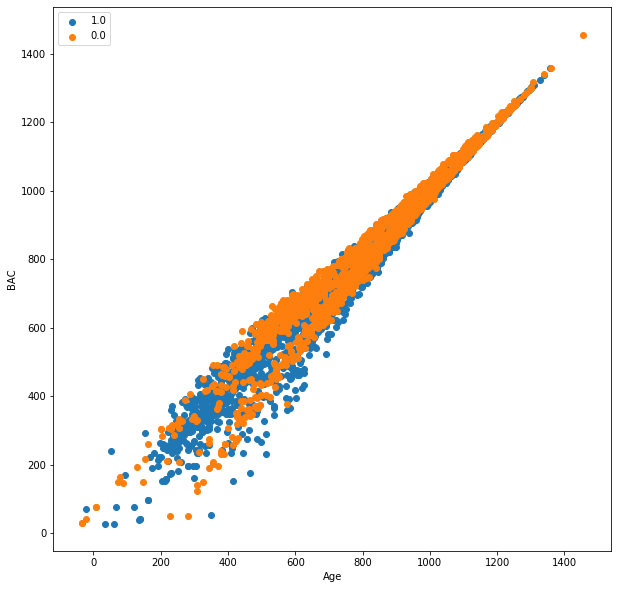

In [119]:
a = BA.Visualize(results)
a.plot('BAC','Age','male')